# Importing Data

In [2]:
# Install using "pip install surprise"
from surprise import SVD, Dataset, accuracy, BaselineOnly, NMF, SVDpp
from surprise.reader import Reader
from surprise.model_selection import cross_validate, GridSearchCV

import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.decomposition
import sklearn.manifold

In [3]:
# Reader that reads tab-separated data
reader = Reader(sep='\t')
full = Dataset.load_from_file("./data/data.txt", reader=reader)
train = Dataset.load_from_file("./data/train.txt", reader=reader)
test = Dataset.load_from_file("./data/test.txt", reader=reader)

# Training Models, Cross Validation, Test Error

In [18]:
# Create the classifier using the SVD model (not Singular Value Decomposition)
# http://surprise.readthedocs.io/en/stable/matrix_factorization.html

reg = [0.001, 0.003, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3]
train_err = []
test_err = []

for r in reg:
    # Train on the training set
    clf = SVD(n_factors=20, biased=False, n_epochs=20, reg_all=r)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(r)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))

0.001
RMSE: 0.8046
RMSE: 0.9364
0.003
RMSE: 0.8131
RMSE: 0.9396
0.01
RMSE: 0.8148
RMSE: 0.9298
0.03
RMSE: 0.8458
RMSE: 0.9352
0.05
RMSE: 0.8655
RMSE: 0.9351
0.1
RMSE: 0.8975
RMSE: 0.9433
0.2
RMSE: 0.9457
RMSE: 0.9733
0.3
RMSE: 0.9772
RMSE: 1.0007


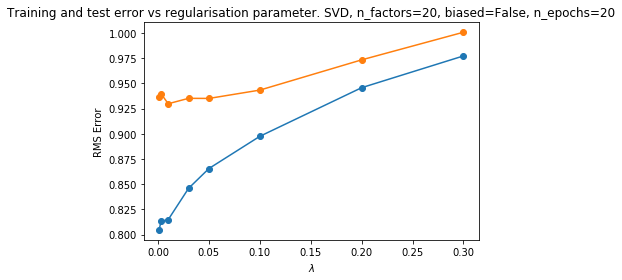

In [23]:
plt.plot(reg, train_err, 'o-', label="Train error")
plt.plot(reg, test_err, 'o-', label="Test error")
plt.title("Training and test error vs regularisation parameter. SVD, n_factors=20, biased=False, n_epochs=20")
plt.xlabel("$\lambda$")
plt.ylabel("RMS Error")
plt.show()

0.001
RMSE: 0.6712
RMSE: 0.9581
0.003
RMSE: 0.6735
RMSE: 0.9639
0.01
RMSE: 0.6832
RMSE: 0.9510
0.03
RMSE: 0.7192
RMSE: 0.9242
0.05
RMSE: 0.7624
RMSE: 0.9145
0.1
RMSE: 0.8468
RMSE: 0.9220
0.2
RMSE: 0.9267
RMSE: 0.9592
0.3
RMSE: 0.9705
RMSE: 0.9947


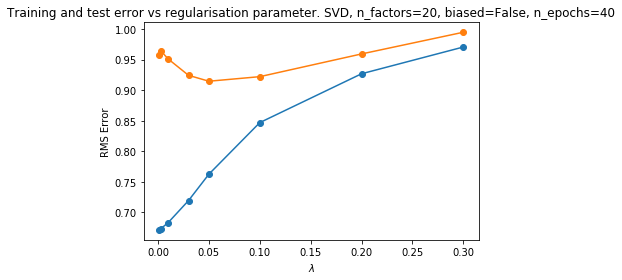

In [30]:
# Create the classifier using the SVD model (not Singular Value Decomposition)
# http://surprise.readthedocs.io/en/stable/matrix_factorization.html

reg = [0.001, 0.003, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3]
train_err = []
test_err = []

for r in reg:
    # Train on the training set
    clf = SVD(n_factors=20, biased=False, n_epochs=40, reg_all=r)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(r)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))
    
plt.plot(reg, train_err, 'o-', label="Train error")
plt.plot(reg, test_err, 'o-', label="Test error")
plt.title("Training and test error vs regularisation parameter. SVD, n_factors=20, biased=False, n_epochs=40")
plt.xlabel("$\lambda$")
plt.ylabel("RMS Error")
plt.show()

0.01
RMSE: 0.6284
RMSE: 0.9801
0.03
RMSE: 0.6518
RMSE: 0.9415
0.05
RMSE: 0.6955
RMSE: 0.9202
0.1
RMSE: 0.8067
RMSE: 0.9130
0.2
RMSE: 0.9166
RMSE: 0.9527
0.3
RMSE: 0.9679
RMSE: 0.9927


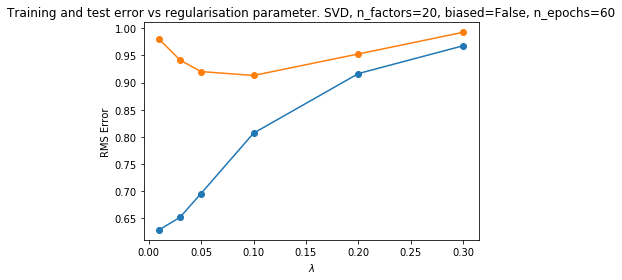

In [31]:
# Create the classifier using the SVD model (not Singular Value Decomposition)
# http://surprise.readthedocs.io/en/stable/matrix_factorization.html

reg = [0.01, 0.03, 0.05, 0.1, 0.2, 0.3]
train_err = []
test_err = []

for r in reg:
    # Train on the training set
    clf = SVD(n_factors=20, biased=False, n_epochs=60, reg_all=r)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(r)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))
    
plt.plot(reg, train_err, 'o-', label="Train error")
plt.plot(reg, test_err, 'o-', label="Test error")
plt.title("Training and test error vs regularisation parameter. SVD, n_factors=20, biased=False, n_epochs=60")
plt.xlabel("$\lambda$")
plt.ylabel("RMS Error")
plt.show()

0.001
RMSE: 0.8105
RMSE: 0.9302
0.003
RMSE: 0.8146
RMSE: 0.9304
0.01
RMSE: 0.8295
RMSE: 0.9302
0.03
RMSE: 0.8534
RMSE: 0.9275
0.05
RMSE: 0.8801
RMSE: 0.9318
0.1
RMSE: 0.9082
RMSE: 0.9378
0.2
RMSE: 0.9229
RMSE: 0.9429
0.3
RMSE: 0.9304
RMSE: 0.9475


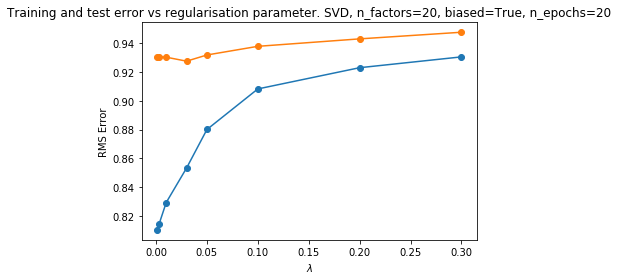

In [33]:
reg = [0.001, 0.003, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3]
train_err = []
test_err = []

for r in reg:
    # Train on the training set
    clf = SVD(n_factors=20, biased=True, n_epochs=20, reg_all=r)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(r)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))
    
plt.plot(reg, train_err, 'o-', label="Train error")
plt.plot(reg, test_err, 'o-', label="Test error")
plt.title("Training and test error vs regularisation parameter. SVD, n_factors=20, biased=True, n_epochs=20")
plt.xlabel("$\lambda$")
plt.ylabel("RMS Error")
plt.show()

0.001
RMSE: 0.6704
RMSE: 0.9722
0.003
RMSE: 0.6718
RMSE: 0.9641
0.01
RMSE: 0.6834
RMSE: 0.9468
0.03
RMSE: 0.7248
RMSE: 0.9314
0.05
RMSE: 0.7728
RMSE: 0.9132
0.1
RMSE: 0.8694
RMSE: 0.9225
0.2
RMSE: 0.9199
RMSE: 0.9411
0.3
RMSE: 0.9279
RMSE: 0.9459


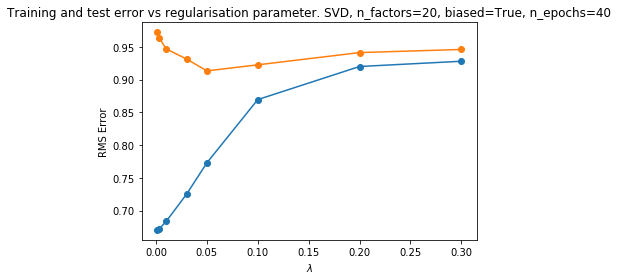

In [28]:
reg = [0.001, 0.003, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3]
train_err = []
test_err = []

for r in reg:
    # Train on the training set
    clf = SVD(n_factors=20, biased=True, n_epochs=40, reg_all=r)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(r)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))
    
plt.plot(reg, train_err, 'o-', label="Train error")
plt.plot(reg, test_err, 'o-', label="Test error")
plt.title("Training and test error vs regularisation parameter. SVD, n_factors=20, biased=True, n_epochs=40")
plt.xlabel("$\lambda$")
plt.ylabel("RMS Error")
plt.show()

0.001
RMSE: 0.6093
RMSE: 0.9920
0.003
RMSE: 0.6117
RMSE: 0.9946
0.01
RMSE: 0.6218
RMSE: 0.9757
0.03
RMSE: 0.6504
RMSE: 0.9353
0.05
RMSE: 0.6975
RMSE: 0.9164
0.1
RMSE: 0.8234
RMSE: 0.9098
0.2
RMSE: 0.9157
RMSE: 0.9389
0.3
RMSE: 0.9271
RMSE: 0.9455


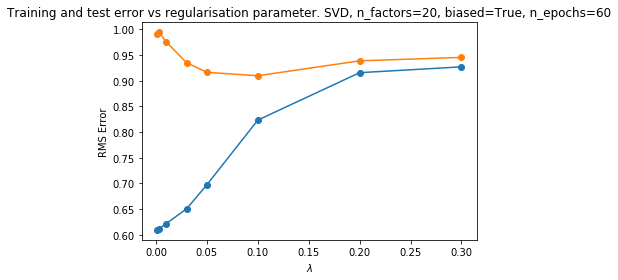

In [29]:
reg = [0.001, 0.003, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3]
train_err = []
test_err = []

for r in reg:
    # Train on the training set
    clf = SVD(n_factors=20, biased=True, n_epochs=60, reg_all=r)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(r)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))
    
plt.plot(reg, train_err, 'o-', label="Train error")
plt.plot(reg, test_err, 'o-', label="Test error")
plt.title("Training and test error vs regularisation parameter. SVD, n_factors=20, biased=True, n_epochs=60")
plt.xlabel("$\lambda$")
plt.ylabel("RMS Error")
plt.show()

0.3
RMSE: 0.8666
RMSE: 0.9168
0.3
RMSE: 0.8476
RMSE: 0.9142
0.3
RMSE: 0.8362
RMSE: 0.9135
0.3
RMSE: 0.8187
RMSE: 0.9096
0.3
RMSE: 0.8107
RMSE: 0.9087
0.3
RMSE: 0.7786
RMSE: 0.9057


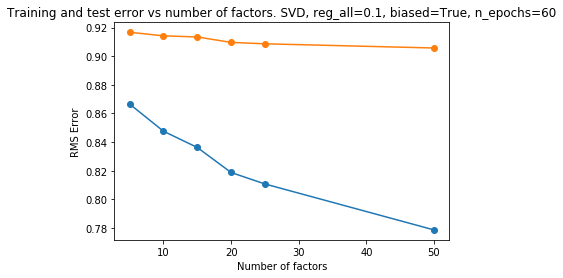

In [34]:
factors = [5, 10, 15, 20, 25, 50]
train_err = []
test_err = []

for f in factors:
    # Train on the training set
    clf = SVD(n_factors=f, biased=True, n_epochs=60, reg_all=0.1)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(f)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))
    
plt.plot(factors, train_err, 'o-', label="Train error")
plt.plot(factors, test_err, 'o-', label="Test error")
plt.title("Training and test error vs number of factors. SVD, reg_all=0.1, biased=True, n_epochs=60")
plt.xlabel("Number of factors")
plt.ylabel("RMS Error")
plt.show()

5
RMSE: 0.9202
RMSE: 0.9408
10
RMSE: 0.9194
RMSE: 0.9408
15
RMSE: 0.9182
RMSE: 0.9402
20
RMSE: 0.9177
RMSE: 0.9400
25
RMSE: 0.9167
RMSE: 0.9397
50
RMSE: 0.9132
RMSE: 0.9386


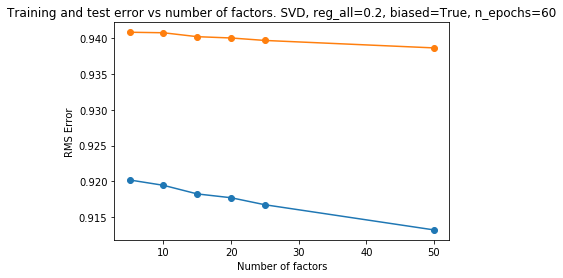

In [36]:
factors = [5, 10, 15, 20, 25, 50]
train_err = []
test_err = []

for f in factors:
    # Train on the training set
    clf = SVD(n_factors=f, biased=True, n_epochs=60, reg_all=0.2)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(f)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))
    
plt.plot(factors, train_err, 'o-', label="Train error")
plt.plot(factors, test_err, 'o-', label="Test error")
plt.title("Training and test error vs number of factors. SVD, reg_all=0.2, biased=True, n_epochs=60")
plt.xlabel("Number of factors")
plt.ylabel("RMS Error")
plt.show()

In [4]:
# Create the classifier using the SVD++ model (not Singular Value Decomposition)
reg = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
train_err = []
test_err = []

for r in reg:
    # Train on the training set
    clf = SVDpp(n_factors=20, n_epochs=5, reg_all=r)
    clf.fit(train.build_full_trainset())

    # Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
    print(r)
    train_err.append(accuracy.rmse(clf.test(train.build_full_trainset().build_testset())))
    test_err.append(accuracy.rmse(clf.test(test.build_full_trainset().build_testset())))
    
plt.plot(reg, train_err, 'o-', label="Train error")
plt.plot(reg, test_err, 'o-', label="Test error")
plt.title("Training and test error vs regularisation parameter. SVDpp, n_factors=20, n_epochs=5")
plt.xlabel("$\lambda$")
plt.ylabel("RMS Error")
plt.show()

0.001
RMSE: 0.8765
RMSE: 0.9210
0.003
RMSE: 0.8834
RMSE: 0.9253


KeyboardInterrupt: 

# Training on Full Dataset, Getting Matrices

In [128]:
# Using the optimized parameters from cross-validation, we fit on the entire training set/
clf = SVD(n_factors=20, n_epochs=60, biased=False)#reg_all=0.1, 
clf.fit(full.build_full_trainset())

In [129]:
# Get the coefficient matrices and check their shapes
U = clf.pu # User coeffs
V = clf.qi # Movie coeffs
print(U.shape)
print(V.shape)

(943, 20)
(1682, 20)


# Attempts at Using TNSE

In [39]:
# tsne = sklearn.manifold.TSNE(n_components=2, perplexity=50, init='pca')
# em = tsne.fit_transform(V)
# em.shape

(1682, 2)

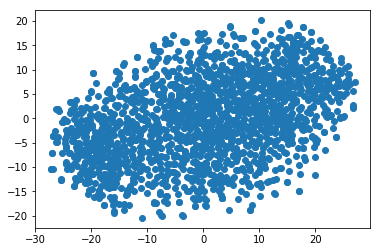

In [40]:
# plt.scatter(em[:, 0], em[:, 1])

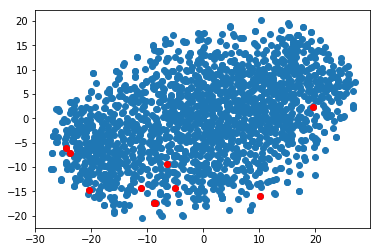

In [41]:
# Scatter the 2 dimensions of the reduced V
# plt.scatter(em[:, 0], em[:, 1])

# Plot by genre
# for i in [movie.idx for movie in list(movies.values()) if movie.genres[1]]:
#     plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='r')
# for i in [movie.idx for movie in list(movies.values()) if movie.genres[2]]:
#     plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='g')
# for i in [movie.idx for movie in list(movies.values()) if movie.genres[2]]:
#     plt.scatter(em[clf.trainset.to_inner_iid(str(i)), 0], em[clf.trainset.to_inner_iid(str(i)), 1], c='y')
    
# Top 10 most popular movies
# for i in [50, 258, 100, 181, 294, 286, 288, 1, 300, 121]:
# for i in [50, 222, 227, 228, 229, 230, 449, 450, 172, 181]:
# for i in best10_idx:
#     plt.scatter(em[clf.trainset.to_inner_iid(str(i)), 0], em[clf.trainset.to_inner_iid(str(i)), 1], c='r')

# SVD and Projection

In [130]:
# Take transpose of V so that we get the same convention as notes: V now is K x N
Vt = V.T
print(Vt.shape)

# Make the rows of V zero-centered
# V -= np.tile(np.mean(V, axis=1).reshape([20, 1]), (1, V.shape[1]))

(20, 1682)


In [131]:
# Do SVD (singular value decomposition) on the matrices
A, Sigma, B = np.linalg.svd(Vt, full_matrices=False) # Vt = A @ np.diag(Sigma) @ B 

print(A.shape)
print(np.diag(Sigma).shape)
print(B.shape)

(20, 20)
(20, 20)
(20, 1682)


In [132]:
print(Sigma)
print((Sigma[0]+Sigma[1])/sum(Sigma))

svd = sklearn.decomposition.TruncatedSVD(n_components=2)
svd.fit(V)
print(svd.explained_variance_ratio_)  
sum(svd.explained_variance_ratio_)

[64.57459898 16.79540709 12.6913469  11.81241735 11.41853097 11.18465868
 10.99806907 10.67179256 10.55736343 10.4500091  10.24487466 10.14304711
  9.85771292  9.80942822  9.69794785  9.59387568  9.31750064  9.18505486
  9.09441387  8.87137207]
0.30479148310182225
[0.12864416 0.11051123]


0.23915539342694464

In [133]:
# Take the first 2 columns of A
A_red = A[:, :2]
print(A_red.shape)

# Multiply with Vt to reduce Vt from 20 dim to 2 dim
V_red = (A_red.T @ Vt)
print(V_red.shape)

# Make each row of V_red have unit variance
V_red /= np.tile(np.std(V_red, axis=1).reshape([2, 1]), (1, V_red.shape[1]))

(20, 2)
(2, 1682)


# Visualization

In [134]:
class Movie():
    """ Object used to hold a Movie and its properties. """
    def __init__(self, idx, name, genres):
        self.idx = idx
        self.name = name
        self.genres = genres
        self.ratings = []
        self.n_ratings = 0
        self.avg_score = 0
    def add_rating(self, rating):
        """ Update the average rating by taking average * n_ratings = total score. Then add the new rating,
        and then divide by (n_ratings + 1) to get the new average. """
        self.avg_score = (self.avg_score * self.n_ratings + rating) / (self.n_ratings + 1)
        self.n_ratings += 1
        self.ratings.append(rating)
    def __repr__(self):
        return "Movie - Id: {0.idx}, Name: {0.name}, n_ratings = {0.n_ratings}, Avg score = {0.avg_score}".format(self)
    
# Dictionary that associates each movie ID to its movie object
movies = {}
# Dictionary that associates each index to the genre name
genres = dict(zip(list(range(19)), ("Unknown", "Action", "Adventure", "Animation", "Childrens", "Comedy", 
                                    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", 
                                    "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western")))

# Read the list of movies and creates a dictionary of movie objects
with open("./data/movies.txt", "r", encoding="UTF8") as f:
    line = f.readline()
    
    # Split each line by the tab character. The 1st entry is the index, the 2nd entry is the name,
    # the 3rd entries onwards are the genres.
    while line != "":
        line = line.split("\t")
        # Convert the index to an int, convert the genres to a list of ints
        idx, name, genres_belong = int(line[0]), line[1], line[2:]
        movies[idx] = Movie(idx, name, [int(x) for x in genres_belong])
        
        line = f.readline()
        
# Read the ratings files and convert into a list of 3-tuples
def read_data(filename):
    with open(filename, "r") as f:
        data = f.readlines()
    # Split each line by the tab character and convert to a tuple of ints
    return [tuple(map(int, line.split("\t"))) for line in data]
       
full_datalist = read_data("./data/data.txt")

# Extract only the ratings from the full dataset
full_ratings = [datapt[2] for datapt in full_datalist]

# Go through the entire rating databast and add all the ratings for each movie
for rating_tuple in full_datalist:
    user_idx, movie_idx, rating = rating_tuple
    movies[movie_idx].add_rating(rating)
    
# Get the top 10 most popular movies by sorting the list of movies by n_ratings
most_pop10 = sorted(list(movies.values()), key=lambda x: x.n_ratings, reverse=True)[:10]
# Movie IDs of these movies
most_pop10_idx = [movie.idx for movie in most_pop10]

# Get the top 10 best movies by sorting the list of movies by avg_score
best10 = sorted(list(movies.values()), key=lambda x: x.avg_score, reverse=True)[:10]
# Movie IDs of these movies
best10_idx = [movie.idx for movie in best10]

# Print how many movies fall in each genre 
for i in range(19):
    print(i, genres[i], len([movie.idx for movie in list(movies.values()) if movie.genres[i]]))
    
# We decide to use 5, 8 ,16 since they have the most data
# Collect the indices of movies that have these genres into lists
genre5_idx = [movie.idx for movie in list(movies.values()) if movie.genres[5]]
genre8_idx = [movie.idx for movie in list(movies.values()) if movie.genres[8]]
genre16_idx = [movie.idx for movie in list(movies.values()) if movie.genres[16]]

star_idx = [50, 222, 227, 228, 229, 230, 449, 450, 172, 181]

0 Unknown 2
1 Action 251
2 Adventure 135
3 Animation 42
4 Childrens 122
5 Comedy 505
6 Crime 109
7 Documentary 50
8 Drama 725
9 Fantasy 22
10 Film-Noir 24
11 Horror 92
12 Musical 56
13 Mystery 61
14 Romance 247
15 Sci-Fi 101
16 Thriller 251
17 War 71
18 Western 27


(2, 798)


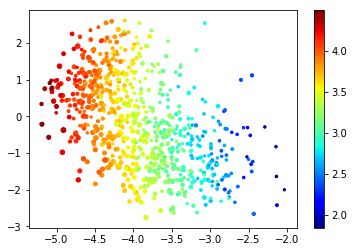

In [176]:
ratings30 = [movie for movie in list(movies.values()) if movie.n_ratings > 30]
ratings30_idx =  [movie.idx for movie in ratings30]

scores30 = np.array([movies[i].avg_score for i in ratings30_idx])
ratings30 = np.array([movies[i].n_ratings for i in ratings30_idx])

V_red_30 = np.array([V_red[:, clf.trainset.to_inner_iid(str(i))] for i in ratings30_idx]).T
print(V_red_30.shape)

plt.scatter(V_red_30[0, :], V_red_30[1, :], c=scores30, cmap='jet', alpha=1, s=np.sqrt(ratings30))
plt.colorbar()
plt.savefig("./Visualizations/Scores30.pdf")

(2, 798)


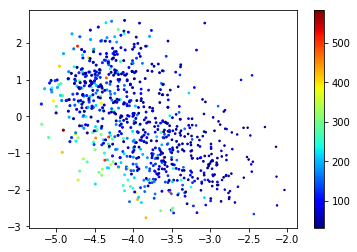

In [175]:

print(V_red_30.shape)

plt.scatter(V_red_30[0, :], V_red_30[1, :], c=ratings30, cmap='jet', alpha=1, s=scores30)
plt.colorbar()

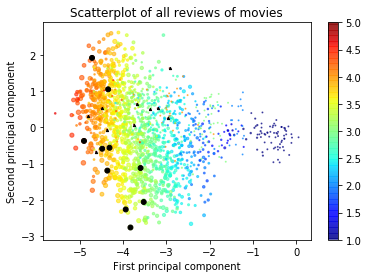

In [190]:
skips = 1
scores = np.array([movies[int(clf.trainset.to_raw_iid(i))].avg_score for i in range(V_red.shape[1])])
nratings = np.array([movies[int(clf.trainset.to_raw_iid(i))].n_ratings for i in range(0, V_red.shape[1], skips)])

plt.scatter(V_red[0, ::skips], V_red[1, ::skips], c=scores, cmap='jet', alpha=0.6, s=np.sqrt(nratings))
plt.colorbar()

for i in most_pop10_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='k', s=np.sqrt(np.array([movies[i].n_ratings for i in most_pop10_idx])))
for i in best10_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='k', marker='^', s=5)
        
plt.title("Scatterplot of all reviews of movies")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.savefig("./Visualizations/Scores.pdf")

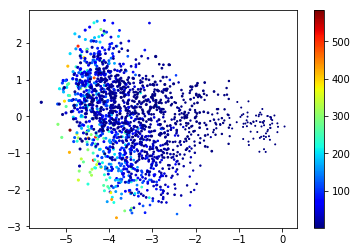

In [166]:
plt.scatter(V_red[0, ::skips], V_red[1, ::skips], c=nratings, cmap='jet', alpha=1, s=scores)
plt.colorbar()

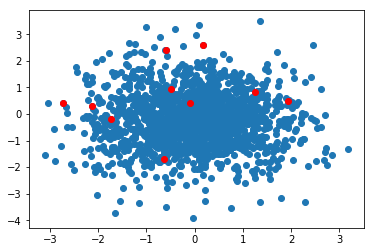

In [68]:
# Scatter the 2 dimensions of the reduced V
plt.scatter(V_red[0, :], V_red[1, :])
# plt.ylim([-0.03,0.03])
# plt.xlim([-0.03,0.03])

# Top 10 most popular movies
for i in most_pop10_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='r')

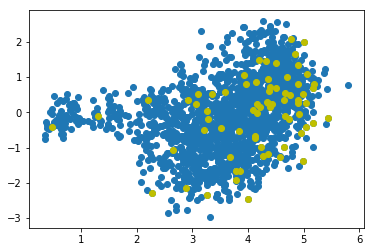

In [98]:
# Scatter the 2 dimensions of the reduced V
plt.scatter(V_red[0, :], V_red[1, :])

# Plot by genre
# for i in [movie.idx for movie in list(movies.values()) if movie.genres[1]]:
#     plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='r')
# for i in [movie.idx for movie in list(movies.values()) if movie.genres[2]]:
#     plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='g')
for i in [movie.idx for movie in list(movies.values()) if movie.genres[17]]:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='y')

Star Wars (1977) 4.3584905660377355 583
Contact (1997) 3.8035363457760316 509
Fargo (1996) 4.15551181102362 508
Return of the Jedi (1983) 4.0078895463510875 507
Liar Liar (1997) 3.156701030927836 485
"English Patient, The (1996)" 3.656964656964657 481
Scream (1996) 3.4414225941422596 478
Toy Story (1995) 3.8783185840707963 452
Air Force One (1997) 3.6310904872389793 431
Independence Day (ID4) (1996) 3.438228438228438 429


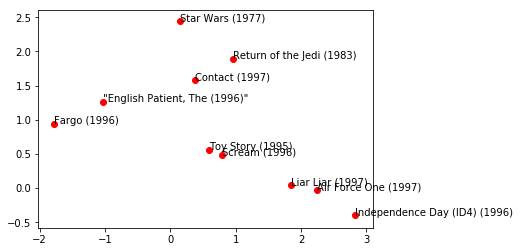

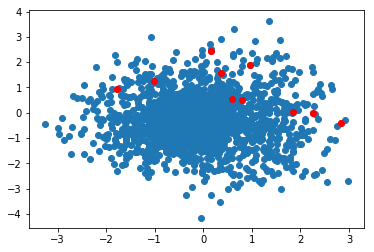

In [59]:
# 10 most popular movies
for i in most_pop10_idx:
    print(movies[i].name, movies[i].avg_score, movies[i].n_ratings)
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c="r")
    plt.annotate(movies[i].name, (V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))]))
    
# Scatter the 2 dimensions of the reduced V
plt.figure()
plt.scatter(V_red[0, :], V_red[1, :])
# Overlay 10 most popular movies
for i in most_pop10_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='r')

"Great Day in Harlem, A (1994)" 5.0 1
They Made Me a Criminal (1939) 5.0 1
Prefontaine (1997) 5.0 3
Marlene Dietrich: Shadow and Light (1996)  5.0 1
Star Kid (1997) 5.0 3
"Saint of Fort Washington, The (1993)" 5.0 2
Santa with Muscles (1996) 5.0 2
Aiqing wansui (1994) 5.0 1
Someone Else's America (1995) 5.0 1
Entertaining Angels: The Dorothy Day Story (1996) 5.0 1


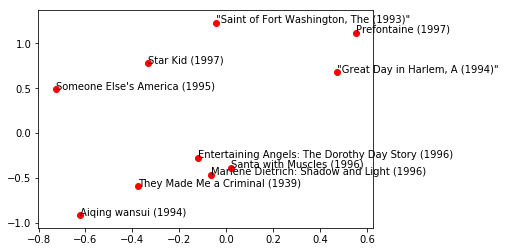

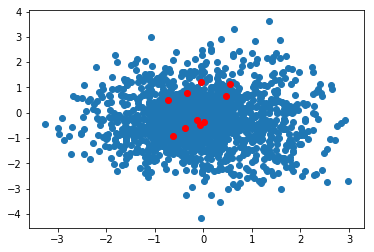

In [60]:
# 10 best movies
for i in best10_idx:
    print(movies[i].name, movies[i].avg_score, movies[i].n_ratings)
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c="r")
    plt.annotate(movies[i].name[:], (V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))]))
    
# Scatter the 2 dimensions of the reduced V
plt.figure()
plt.scatter(V_red[0, :], V_red[1, :])
# Overlay 10 best movies
for i in best10_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='r')

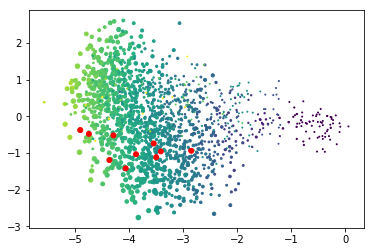

In [198]:
# 10 arbitrary movies
# for i in star_idx:
#     print(movies[i].name, movies[i].avg_score, movies[i].n_ratings)
#     plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c="r")
#     plt.annotate(movies[i].name[:], (V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))]))
    
# Scatter the 2 dimensions of the reduced V
plt.figure()
plt.scatter(V_red[0, :], V_red[1, :], c=scores, s=np.sqrt(nratings))
# Overlay 10 arbitrary movies
for i in star_idx:
    plt.scatter(V_red[0, clf.trainset.to_inner_iid(str(i))], V_red[1, clf.trainset.to_inner_iid(str(i))], c='r', s=np.sqrt(np.array([movies[i].n_ratings for i in star_idx])))